# LeNet-5 from scratch

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms 

from modules.activation import SoftMax, SquashedTanh
from modules.criterion import CrossEntropy
from modules.init import LeCun
from modules.layer import Linear, Conv, Flatten
from modules.model import Sequential, train, test
from modules.optimizer import Adam
from modules.pooling import AvgPool
from modules.constant import C3_MAPPING
from modules.utils import save_model

It can be achieved through linear scaling of the data points

In [15]:
composed_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(0, 1)
])


In [16]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=composed_transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=composed_transform)

X_train = np.array([data[0].numpy() for data in train_dataset])
y_train = np.array([data[1] for data in train_dataset])
X_test = np.array([data[0].numpy() for data in test_dataset])
y_test = np.array([data[1] for data in test_dataset])

LeNet-5 Architecture

<img src='img/architecture.png' width=100%>

The activation function of the LeNet model <code>SquashedTanh</code> is a modification of the Tanh function with $S=\frac{2}{3}$ and $A=1.7159$

<img src='img/activation.png' width=50%>

The feature maps in layer C3 (<code>C3_MAPPING</code>) takes specific output channels from S2 according to the following table

<img src='img/mappings.png' width=50%>

>

In [17]:
init_method = LeCun()

model = Sequential([
    # Conv Layers
    Conv((32, 32), 128, 1, 6, 5), #c1
    AvgPool(2), #s2
    SquashedTanh(),
    Conv((14, 14), 128, 6, 16, 5, mapping=C3_MAPPING), #c3
    AvgPool(2), #s4
    SquashedTanh(), 
    Conv((5, 5), 128, 16, 120, 5), #c5
    SquashedTanh(),
    
    # FC Layers
    Flatten(),
    Linear(120, 84, init_method), #f6
    SquashedTanh(),
    Linear(84, 10, init_method), #output
    SoftMax()
])

In [18]:
criterion = CrossEntropy()
optimizer = Adam(model, lr=0.001)

In [19]:
train_acc, train_loss = train(
    model, X_train, y_train, criterion, optimizer, 10, 128
)



Epoch 1


Training: 100%|██████████| 468/468 [29:12<00:00,  3.74s/it]


Accuracy: 0.7798666666666667 | Loss: 430.13973549591395

Epoch 2


Training: 100%|██████████| 468/468 [25:07<00:00,  3.22s/it]


Accuracy: 0.8748666666666667 | Loss: 186.6080140492726

Epoch 3


Training: 100%|██████████| 468/468 [25:14<00:00,  3.24s/it]


Accuracy: 0.8873 | Loss: 166.51594385498547

Epoch 4


Training: 100%|██████████| 468/468 [25:11<00:00,  3.23s/it]


Accuracy: 0.8971333333333333 | Loss: 150.62613396484798

Epoch 5


Training: 100%|██████████| 468/468 [25:07<00:00,  3.22s/it]


Accuracy: 0.9083 | Loss: 134.71410499065544

Epoch 6


Training: 100%|██████████| 468/468 [25:13<00:00,  3.23s/it]


Accuracy: 0.9165666666666666 | Loss: 121.8971505341556

Epoch 7


Training: 100%|██████████| 468/468 [25:12<00:00,  3.23s/it]


Accuracy: 0.9242833333333333 | Loss: 111.00054892081832

Epoch 8


Training: 100%|██████████| 468/468 [25:17<00:00,  3.24s/it]


Accuracy: 0.9292 | Loss: 103.14452953121905

Epoch 9


Training: 100%|██████████| 468/468 [25:11<00:00,  3.23s/it]


Accuracy: 0.93365 | Loss: 97.37314132256337

Epoch 10


Training: 100%|██████████| 468/468 [25:13<00:00,  3.23s/it]

Accuracy: 0.9362833333333334 | Loss: 92.6486071481196


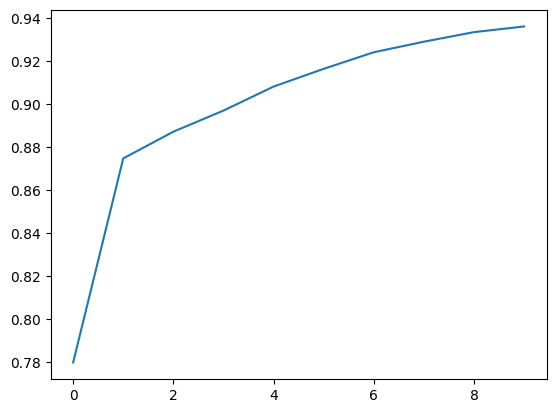

In [20]:
plt.plot(train_acc)
plt.show()

In [23]:
save_model(model, 'model_10ep.pkl')

True

In [46]:
test_acc  = test(
    model, X_train, y_train, 128
)

Testing:   0%|          | 0/468 [00:00<?, ?it/s]


ValueError: correlate2d inputs must both be 2-D arrays